### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-22/11/19
#### Clasificacion de RWE-DWT de MI-EEG con CNN
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [8]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [9]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 3, 1))
x_test = x_test.reshape((n_samples_test, 22, 3, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3, 1)
(288, 22, 3, 1)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
288/288 [==============================] - 0s 139us/sample - loss: 1.6966 - acc: 0.5243
kappa:  0.3657407407407407
confusion matrix:
 [[43 14  7  8]
 [25 38  8  1]
 [10  0 36 26]
 [ 8  1 29 34]]
(0.5399336888159694, 0.5243055555555556, 0.5270643778851923, None)


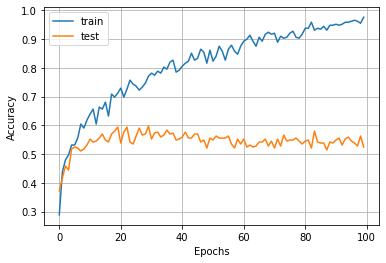

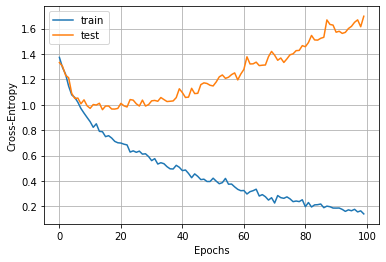

Iteration: 2
288/288 [==============================] - 0s 83us/sample - loss: 1.5490 - acc: 0.5243
kappa:  0.3657407407407407
confusion matrix:
 [[41 21  5  5]
 [22 41  8  1]
 [ 8  1 37 26]
 [ 7  1 32 32]]
(0.5293713844590369, 0.5243055555555556, 0.5251788897377132, None)


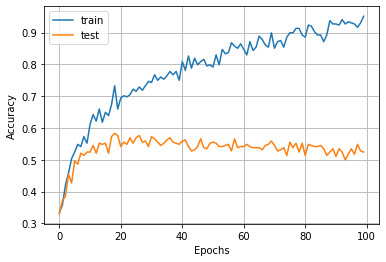

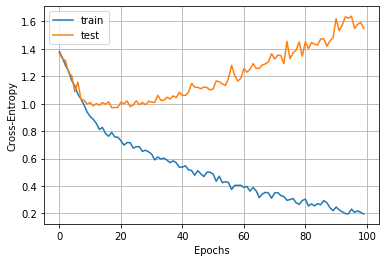

Iteration: 3
288/288 [==============================] - 0s 82us/sample - loss: 1.8911 - acc: 0.5243
kappa:  0.3657407407407407
confusion matrix:
 [[45  9  7 11]
 [29 32  8  3]
 [ 5  1 29 37]
 [ 7  1 19 45]]
(0.5491273301956441, 0.5243055555555556, 0.5228714769097267, None)


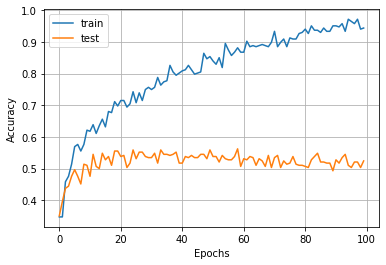

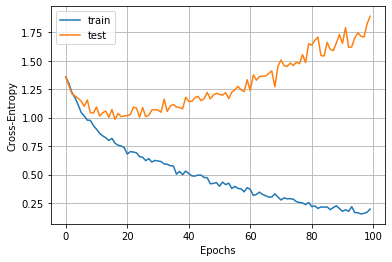

Iteration: 4
288/288 [==============================] - 0s 110us/sample - loss: 1.7549 - acc: 0.5104
kappa:  0.3472222222222222
confusion matrix:
 [[31 30  5  6]
 [17 46  8  1]
 [ 5  3 42 22]
 [ 8  2 34 28]]
(0.5098090346035915, 0.5104166666666666, 0.5058300651607209, None)


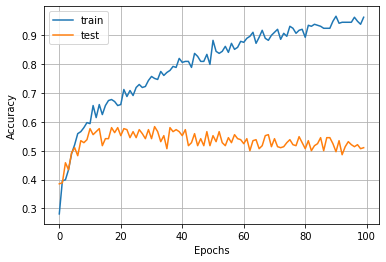

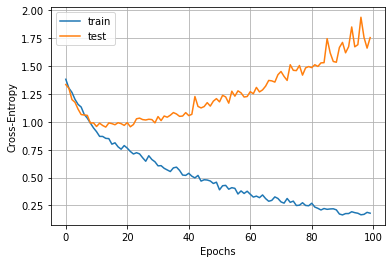

Iteration: 5
288/288 [==============================] - 0s 84us/sample - loss: 1.9428 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[26 38  1  7]
 [12 52  7  1]
 [12  8 30 22]
 [11  3 21 37]]
(0.500448593896643, 0.5034722222222222, 0.49563072021704524, None)


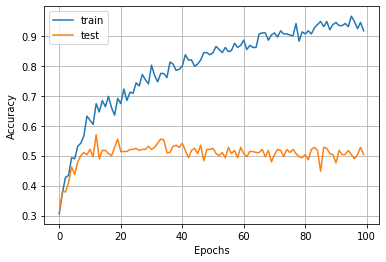

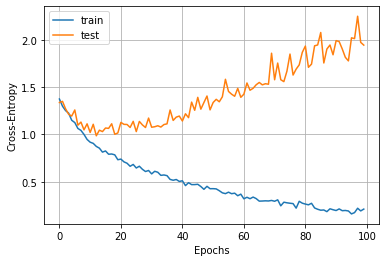

Iteration: 6
288/288 [==============================] - 0s 91us/sample - loss: 1.7224 - acc: 0.5174
kappa:  0.3564814814814815
confusion matrix:
 [[29 26  9  8]
 [12 51  7  2]
 [ 5  1 43 23]
 [ 5  2 39 26]]
(0.5213952318215421, 0.5173611111111112, 0.5113565662131936, None)


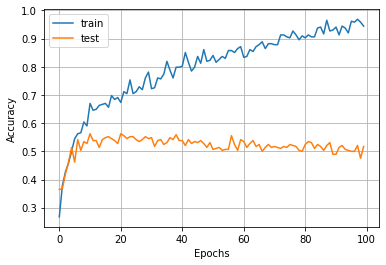

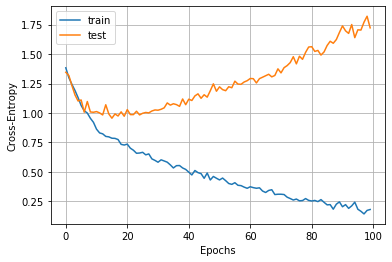

Iteration: 7
288/288 [==============================] - 0s 92us/sample - loss: 1.8392 - acc: 0.5174
kappa:  0.3564814814814815
confusion matrix:
 [[36 21 10  5]
 [18 39 14  1]
 [ 4  3 38 27]
 [ 7  1 28 36]]
(0.5267956266257897, 0.517361111111111, 0.5197127393404142, None)


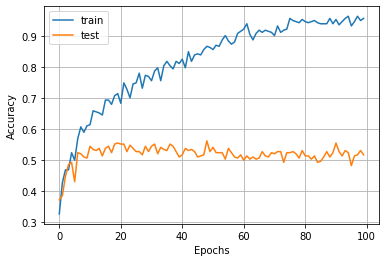

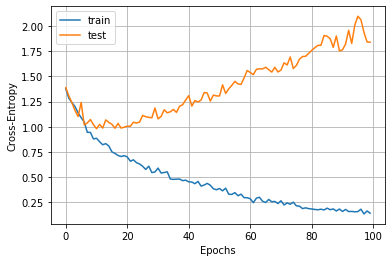

Iteration: 8
288/288 [==============================] - 0s 90us/sample - loss: 1.7607 - acc: 0.5104
kappa:  0.3472222222222222
confusion matrix:
 [[27 34  2  9]
 [12 51  8  1]
 [11  3 31 27]
 [11  2 21 38]]
(0.5039890710382514, 0.5104166666666667, 0.5038345092772205, None)


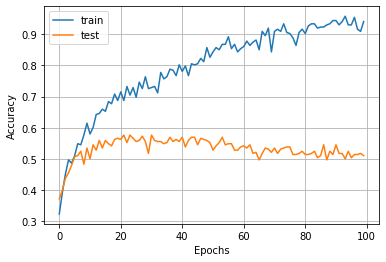

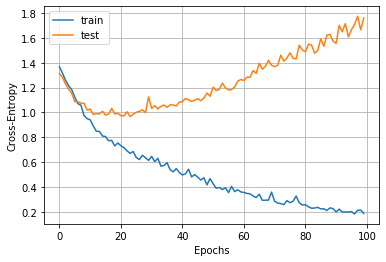

Iteration: 9
288/288 [==============================] - 0s 88us/sample - loss: 1.7832 - acc: 0.5451
kappa:  0.3935185185185185
confusion matrix:
 [[35 26  6  5]
 [16 44 12  0]
 [ 4  3 41 24]
 [ 8  2 25 37]]
(0.5477308802308802, 0.5451388888888888, 0.5447577209999571, None)


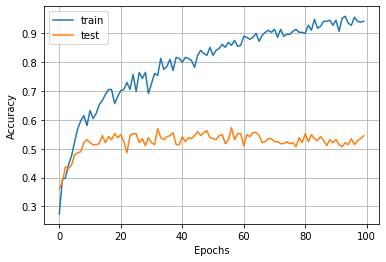

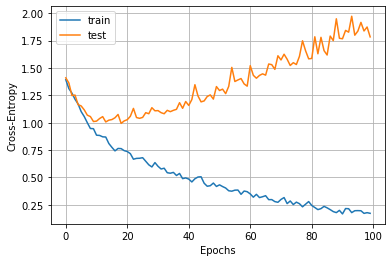

Iteration: 10
288/288 [==============================] - 0s 84us/sample - loss: 1.8405 - acc: 0.4931
kappa:  0.32407407407407407
confusion matrix:
 [[35 25  6  6]
 [22 43  6  1]
 [15  5 33 19]
 [12  3 26 31]]
(0.49777613046701263, 0.4930555555555555, 0.49298941159406273, None)


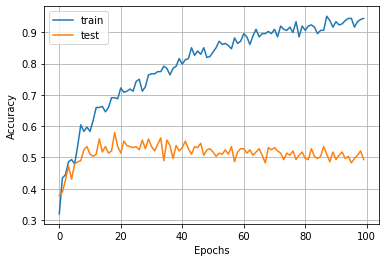

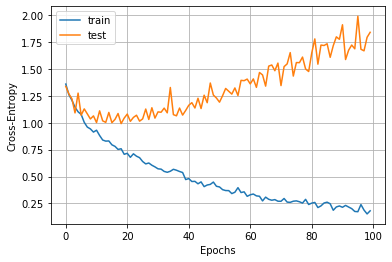


Resultados:
loss: [1.6966390874650743, 1.5489881171120539, 1.8910578224394057, 1.7549010382758246, 1.9428380330403645, 1.7224152750439115, 1.839247743288676, 1.7607131666607327, 1.7832258542378743, 1.840476844045851]
accuracy: [0.5243056, 0.5243056, 0.5243056, 0.5104167, 0.5034722, 0.5173611, 0.5173611, 0.5104167, 0.5451389, 0.49305555]
kappa: [0.3657407407407407, 0.3657407407407407, 0.3657407407407407, 0.3472222222222222, 0.3379629629629629, 0.3564814814814815, 0.3564814814814815, 0.3472222222222222, 0.3935185185185185, 0.32407407407407407]
precision: [0.5399336888159694, 0.5293713844590369, 0.5491273301956441, 0.5098090346035915, 0.500448593896643, 0.5213952318215421, 0.5267956266257897, 0.5039890710382514, 0.5477308802308802, 0.49777613046701263]
recall: [0.5243055555555556, 0.5243055555555556, 0.5243055555555556, 0.5104166666666666, 0.5034722222222222, 0.5173611111111112, 0.517361111111111, 0.5104166666666667, 0.5451388888888888, 0.4930555555555555]
f1: [0.5270643778851923, 0.5251

In [13]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(22,3,1)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [14]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 20, 1, 32)         320       
_________________________________________________________________
flatten_9 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                20512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 132       
Total params: 20,964
Trainable params: 20,964
Non-trainable params: 0
_________________________________________________________________


In [15]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.5170
std: (+/- 0.0134)
kappa: 0.3560
precision: 0.5226
recall: 0.5170
f1: 0.5149
